<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.975 · Deep Learning · PAC3</p>
<p style="margin: 0; text-align:right;">2024-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 3: Transformers amb Keras


<u>Consideracions generals</u>:

- Aquesta PAC s'ha de realitzar de forma **estrictament individual**. Qualsevol indicatiu de còpia serà penalitzat amb un suspens (D) per a totes les parts implicades i la possible avaluació negativa de l'assignatura de manera íntegra.
- És necessari que l'estudiant indiqui **totes les fonts** que ha utilitzat per a la realització de la PAC. De no ser així, es considerarà que l'estudiant ha comès plagi, sent penalitzat amb un suspens (D) i la possible avaluació negativa de l'assignatura de manera íntegra.

<u>Format de l'entrega</u>:

- Alguns exercicis poden suposar diversos minuts d'execució, per la qual cosa l'entrega s'ha de fer en **format notebook** i en **format html**, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a HTML des del menú File $\to$ Download as $\to$ HTML.
- Existeix un tipus de cel·la especial per allotjar text. Aquest tipus de cel·la us serà molt útil per respondre a les diferents preguntes teòriques plantejades al llarg de l'activitat. Per canviar el tipus de cel·la a aquest tipus, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

## Preparació per Kaggle

In [1]:
!pip install tf-models-official==2.18.0 --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow-metadata to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 73.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.9 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=c46016e085714b141ff60c3f3942d10c2f8721a63562170c294cae7e62551e6e
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval
  Attempting uninstal

## Càrrega de llibreries
A continuació es mostren les principals llibreries necessàries per executar aquesta PAC.

In [5]:
import tensorflow as tf
import keras
from transformers import BertTokenizer, TFBertModel

from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, Embedding, GlobalAveragePooling1D
from keras.layers import LSTM, SimpleRNNCell, Flatten, Dropout, MultiHeadAttention, Bidirectional, TimeDistributed, Dense, Embedding
from tensorflow.keras.layers import Permute, dot, add, concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau


from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization

import matplotlib.pyplot as plt



In [3]:
print(tf.__version__)
print(hub.__version__)
print(text.__version__)

2.18.0
0.16.1
2.18.1


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<p><strong>Es recomana en aquesta PAC utilitzar tensorflow 2.14. Utilitzar altres versions pot dificultar el treball en la part sobre downstream models a causa de la incompatibilitat de llibreries</strong> </p>
</div>

## Context

En aquesta PAC utilitzarem models de transformers, capes d'atenció, capes bidireccionals i alguns altres algorismes estudiats fins ara per construir i entrenar fent dos exercicis relacionats amb el llenguatge natural. Aquest entorn és on les arquitectures basades en transformers són més potents.


Els objectius de la pràctica són:

* Càrrega, preprocessament, exploració i visualització de les dades.
* Entrenament d'un model base amb els coneixements adquirits fins ara.
* Comprensió de les capes bidireccionals.
* Comprensió i aplicació de les capes d'atenció.
* Comprensió i aplicació de blocs transformers bàsics.
* Comprensió i aplicació de blocs transformers avançats.
* Aplicació sobre domini (downstream models) d'arquitectures preentrenades basades en transformers.
* Adquisició de coneixements i capacitat crítica que permeti continuar millorant els resultats.

## 1 Càrrega de dades (0.5 punts)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.5 pt]:</strong> IMBD és una base de dades que conté ressenyes de pel·lícules, juntament amb la valoració sobre si el comentari és positiu o negatiu. En aquesta primera part realitza el següent:

* Descarrega la base de dades d'IMBD des de keras i mostra 2 exemples de comentaris positius i 2 exemples de comentaris negatius. Les paraules estan codificades en números, mostra els exemples en text. Tens informació de com fer-ho a: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/get_word_index
* Reprodueix la taula 1 (només les dades de la fila 3) del paper Long Short-Term Memory with Dynamic Skip Connections (https://arxiv.org/pdf/1811.03873v1). Calcula els valors d'aquesta taula sobre la base de dades de l'IMBD amb què estem treballant. Fes particions de dades o les suposicions que consideris. Si hi hagués alguna diferència amb el paper, indica-la.
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<p><strong>Solució:</strong> </p>
</div>

In [7]:
# source: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/get_word_index

# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char   = 2
index_from = 3

# Carreguem i separem text de etiquetes
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(
    start_char=start_char,
    oov_char=oov_char,
    index_from=index_from
)

# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()

# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"

# Agafem 2 positives i 2 negatives
pos_idx = [i for i, y in enumerate(y_train) if y == 1][:2]
neg_idx = [i for i, y in enumerate(y_train) if y == 0][:2]

# Mostrem les ressenyes
print("=== POSITIVES ===")
for i in pos_idx:
    print(" ".join(inverted_word_index[token] for token in x_train[i])[:250], "...\n")

print("=== NEGATIVES ===")
for i in neg_idx:
    print(" ".join(inverted_word_index[token] for token in x_train[i])[:250], "...\n")

1641221/1641221 [==============================] - 0s 0us/step
=== POSITIVES ===
[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father ca ...

[START] the scots excel at storytelling the traditional sort many years after the event i can still see in my mind's eye an elderly lady my friend's mother retelling the battle of culloden she makes the characters come alive her passion is that of an ...

=== NEGATIVES ===
[START] big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridicu ...

[START] this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was

In [8]:
import pandas as pd

# 85% per entrenament, 15% validació
dev_size   = int(0.15 * len(x_train))
train_size = len(x_train) - dev_size

# Vocabulari total únic (TRAIN + TEST)
unique_tokens = set()
for seq in list(x_train) + list(x_test):
    unique_tokens.update(seq)
vocab_size = len(unique_tokens)

# Columnes de la fila 1 de la taula del paper
row = {
    "Task":      "Sentiment Analysis",
    "Dataset":   "IMDB",
    "Level":     "sentence",
    "Vocab":     vocab_size,
    "#Train":    train_size,
    "#Dev":      dev_size,
    "#Test":     len(x_test),
    "#class":    len(set(y_train))
}

# Mostrem la taula
df = pd.DataFrame([row])
print(df.to_markdown(index=False))

| Task               | Dataset   | Level    |   Vocab |   #Train |   #Dev |   #Test |   #class |
|:-------------------|:----------|:---------|--------:|---------:|-------:|--------:|---------:|
| Sentiment Analysis | IMDB      | sentence |   88585 |    21250 |   3750 |   25000 |        2 |


En el paper el vocabulari conté 112540 tokens, en canvi, amb Keras obtenim 88585. Això és perquè per defecte Keras limita el diccionari a les paraules més freqüents.

*Source: https://keras.io/2/api/datasets/imdb/*

## 2 Model base LSTM (1 punt)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [1 pt]:</strong>

    
Ara intentarem completar algunes parts de la taula 4 del paper Long Short-Term Memory with Dynamic Skip Connections https://arxiv.org/pdf/1811.03873v1.

Es recomana, en primer lloc, entendre les dificultats que afronta el llenguatge natural. Per això observa la Figura 1 del paper i llegeix la introducció, en particular el penúltim paràgraf.


* En aquesta part, entrena un model simple LSTM tal com apareix a la primera fila de la taula 4. Mostra les gràfiques d'accuracy i loss durant l'entrenament (de la partició d'eval i de train), així com el resultat final sobre test. Repasseu el text corresponent a la secció "Sentiment Analysis on IMDB" per intentar reproduir els resultats. Discuteix les decisions que has hagut de prendre en cas de no tenir tota la informació. Implementa un early stopping i queda't sempre amb el millor model sobre el dataset d'avaluació.
    
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<p><strong>Solució:</strong> </p>
</div>

Epoch 1/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.5039 - loss: 0.6955 - val_accuracy: 0.4920 - val_loss: 0.6951
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5158 - loss: 0.6891 - val_accuracy: 0.5048 - val_loss: 0.6913
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5544 - loss: 0.6503 - val_accuracy: 0.5043 - val_loss: 0.7033
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5705 - loss: 0.6131 - val_accuracy: 0.5077 - val_loss: 0.7254
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5695 - loss: 0.5991 - val_accuracy: 0.5051 - val_loss: 0.7916
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5720 - loss: 0.5952 - val_accuracy: 0.5064 - val_loss: 0.7767
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6067 - loss: 0.5844 - val_accuracy: 0.8123 - val_loss: 0.4898
Epoch 8/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8698 - loss: 0.3

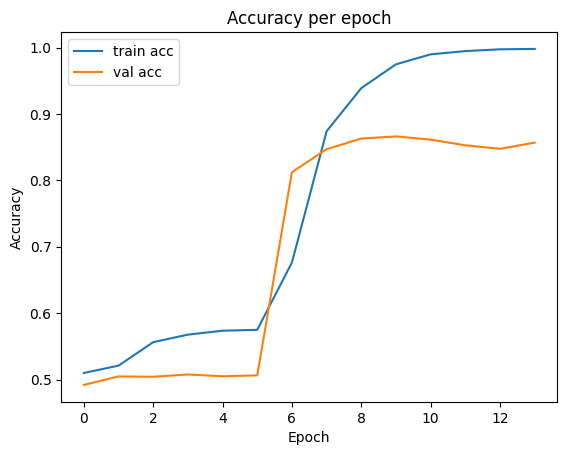

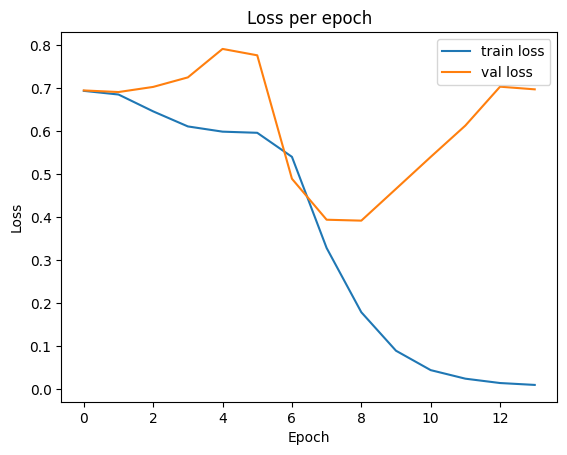

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8513 - loss: 0.4329

Test loss: 0.4287, Test accuracy: 0.8513


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import RandomUniform

x_train_part, x_val, y_train_part, y_val = train_test_split(
    x_train, y_train, test_size=0.15, random_state=42
)

# màxima longitud de 400 (ho fan així al paper)
maxlen = 400
x_train_pad = pad_sequences(x_train_part, maxlen=maxlen, padding='post', truncating='post')
x_val_pad   = pad_sequences(x_val,       maxlen=maxlen, padding='post', truncating='post')
x_test_pad  = pad_sequences(x_test,      maxlen=maxlen, padding='post', truncating='post')

embedding_dim = 100

model = Sequential([
    Embedding(input_dim=vocab_size + index_from + 1,
              output_dim=embedding_dim,
              embeddings_initializer=RandomUniform(-0.25, 0.25)),
    # 128 hidden
    LSTM(128),
    # Dropout 0.2
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Afegirem early stopping
es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Entrenament
history = model.fit(
    x_train_pad, y_train_part,
    validation_data=(x_val_pad, y_val),
    epochs=100,
    # batch size 50
    batch_size=50,
    callbacks=[es]
)

# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy per epoch')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss per epoch')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend()
plt.show()

# Resultats
test_loss, test_acc = model.evaluate(x_test_pad, y_test, batch_size=50)
print(f"\nTest loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

Existeix una diferència de casi un 5% en el rendiment respecte al del paper original. Això segurament és degut a la inicialització i als embeddings (word2vec vs aleatoris de dimensió 100). També pot ser degut a hiperparàmetres com el learning rate. Es podria fer servir grid search i k-fold validation per a tindre resultats més robustos.

## 3 Model basat en mecanismes d'atenció. (2 punts)



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [2 pts.]:</strong>
En aquest exercici, hauràs de construir i entrenar una petita arquitectura que combini una capa d'Embedding, mecanismes d'atenció (Multi-Head Attention) i connexions residuals, simulant els principis bàsics dels Transformers. Per això el model constarà:


* Entrada del model.
* Capa d'Embedding: Utilitza una capa Embedding.
* Capa d'Atenció: Incorpora una capa MultiHeadAttention. Aquesta capa ha de rebre com a entrada la seva pròpia sortida, simulant una atenció self-attention.
* Connexió Residual: Afegeix la sortida de la capa d'atenció a la sortida original de la capa d'embedding mitjançant una operació de suma (Add). Posteriorment, aplica una capa de normalització (LayerNormalization).
* Capa de Flatten i Regularització.
* Finalment afegeix una darrera capa classificadora d'una neurona i activació sigmoide

Amb aquesta arquitectura hauràs de:
* Mostrar el resum del model i el diagrama de blocs.
* Entrenar el model i obtenir els resultats sobre test. Mostra les corbes d'entrenament. Quan entrenis el model, també implementa un early stopping i queda't amb el model que et doni millors resultats en validació.
* Comenta i discuteix què has realitzat. Compara els teus resultats amb els obtinguts anteriorment. Amplia la taula de resultats demanada a l'exercici anterior. Pren les decisions sobre els paràmetres que consideris.

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<p><strong>Solució:</strong> </p>
</div>

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 400)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 400, 100)       │      8,858,500 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_2    │ (None, 400, 100)       │        161,300 │ embedding_6[0][0],     │
│ (MultiHeadAttention)      │                        │                │ embedding_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 400, 100)       │              0 │ embedding_6[0][0],     │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 400, 100)       │            200 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 40000)          │              0 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 40000)          │              0 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │         40,001 │ dropout_8[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,060,001 (34.56 MB)

 Trainable params: 9,060,001 (34.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


I0000 00:00:1746700893.718272     112 service.cc:148] XLA service 0x47dd1f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746700893.724663     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746700893.724692     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/425 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.4000 - loss: 1.3793

I0000 00:00:1746700897.960519     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


425/425 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.5966 - loss: 0.8302 - val_accuracy: 0.7680 - val_loss: 0.6137
Epoch 2/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9741 - loss: 0.0753 - val_accuracy: 0.8283 - val_loss: 0.4566
Epoch 3/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9990 - loss: 0.0106 - val_accuracy: 0.8565 - val_loss: 0.4563
Epoch 4/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9994 - loss: 0.0042 - val_accuracy: 0.8549 - val_loss: 0.4735
Epoch 5/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8459 - val_loss: 0.5178
Epoch 6/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 1.0000 - loss: 8.4283e-04 - val_accuracy: 0.8616 - val_loss: 0.5002
Epoch 7/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.8539 - val_loss: 0.5115
Epoch 8/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 1.0000 - loss: 2.9643e-04 - val

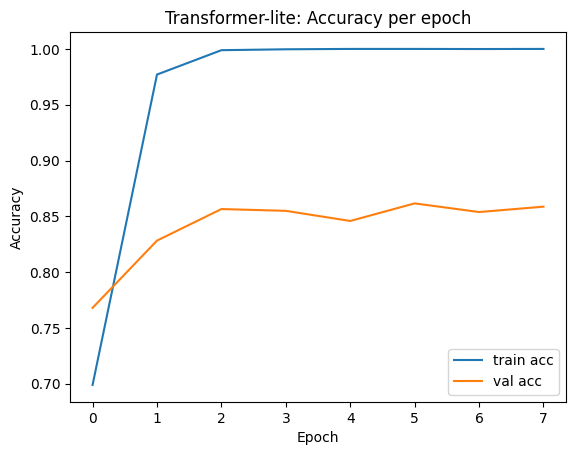

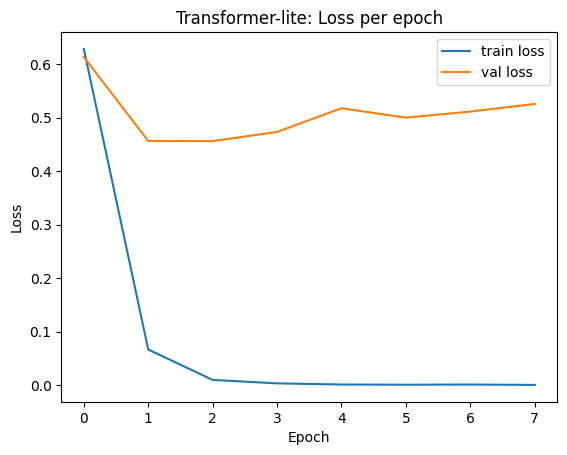

500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8482 - loss: 0.4677
Transformer-lite Test loss: 0.4675, Test accuracy: 0.8475

Taula de resultats:
| Model                  |   Test Accuracy |
|:-----------------------|----------------:|
| LSTM estàndard         |         0.85132 |
| Transformer-exercici-3 |         0.84752 |


In [19]:
from tensorflow.keras.models import Model

inputs = keras.Input(shape=(maxlen,), dtype='int32')
# Embeddings
x = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# Atenció
attn_out = layers.MultiHeadAttention(num_heads=4, key_dim=embedding_dim)(x, x)

# Residual + LayerNorm
x = layers.Add()([x, attn_out])
x = layers.LayerNormalization()(x)

# Flatten + Dropout + Classificació
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_attn = Model(inputs, outputs)
model_attn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Resum del model
model_attn.summary()
keras.utils.plot_model(model_attn, show_shapes=True, show_layer_names=True)

# Entrenament
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history2 = model_attn.fit(
    x_train_pad, y_train_part,
    validation_data=(x_val_pad, y_val),
    epochs=50, batch_size=50,
    callbacks=[es]
)

# Plots
plt.figure()
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.title('Transformer-lite: Accuracy per epoch')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

plt.figure()
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title('Transformer-lite: Loss per epoch')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.show()

# Resultats
test_loss2, test_acc2 = model_attn.evaluate(x_test_pad, y_test, batch_size=50)
print(f"Transformer-lite Test loss: {test_loss2:.4f}, Test accuracy: {test_acc2:.4f}")

# Comparació de resultats
results = pd.DataFrame([
    {'Model': 'LSTM estàndard',        'Test Accuracy': test_acc},
    {'Model': 'Transformer-exercici-3',      'Test Accuracy': test_acc2},
])
print("\nTaula de resultats:")
print(results.to_markdown(index=False))

La LSTM té un resultat lleugerament millor que el Transformer. Això pot ser pel nombre de caps que estem fent servir (4) i l'embedding de dimensió 100. Al igual que en el cas anterior hi ha marge de millora simplement fent un grid search sobre el nombre de caps i altres hiperparàmetres. 

## 4 Model basat en mecanismes d'atenció millorat. (0.5 punts)



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.5 pts.]:</strong>
Fes alguna modificació sobre l'arquitectura anterior i reentrena el model. Algunes idees poden ser: afegir diversos caps d'atenció, modificar els residus, incloure-hi alguna capa recurrent, etc.

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<p><strong>Solució:</strong> </p>
</div>

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 400)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 400, 100)       │      8,858,500 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_3    │ (None, 400, 100)       │        322,500 │ embedding_3[0][0],     │
│ (MultiHeadAttention)      │                        │                │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 400, 100)       │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_6 (Add)               │ (None, 400, 100)       │              0 │ embedding_3[0][0],     │
│                           │                        │                │ dropout_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_9     │ (None, 400, 100)       │            200 │ add_6[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 400, 200)       │         20,200 │ layer_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 400, 200)       │              0 │ conv1d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 400, 100)       │         20,100 │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 400, 100)       │              0 │ layer_normalization_9… │
│                           │                        │                │ conv1d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_10    │ (None, 400, 100)       │            200 │ add_7[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 400, 200)       │        160,800 │ layer_normalization_1… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_11    │ (None, 400, 200)       │            400 │ bidirectional_3[0][0]  │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 200)            │              0 │ layer_normalization_1… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 200)            │              0 │ global_average_poolin… │
├──────────────────────

 Total params: 9,383,101 (35.79 MB)

 Trainable params: 9,383,101 (35.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 66s 140ms/step - accuracy: 0.5906 - loss: 0.6822 - val_accuracy: 0.8907 - val_loss: 0.2696
Epoch 2/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 58s 137ms/step - accuracy: 0.9332 - loss: 0.1848 - val_accuracy: 0.8760 - val_loss: 0.3083
Epoch 3/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 59s 138ms/step - accuracy: 0.9757 - loss: 0.0732 - val_accuracy: 0.8757 - val_loss: 0.3415
Epoch 4/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 59s 138ms/step - accuracy: 0.9896 - loss: 0.0305 - val_accuracy: 0.8648 - val_loss: 0.6237
Epoch 5/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 58s 137ms/step - accuracy: 0.9946 - loss: 0.0193 - val_accuracy: 0.8707 - val_loss: 0.8153
Epoch 6/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 58s 137ms/step - accuracy: 0.9952 - loss: 0.0163 - val_accuracy: 0.8699 - val_loss: 0.7464


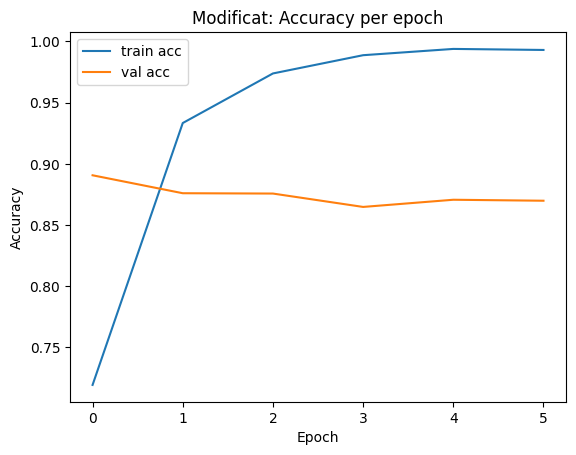

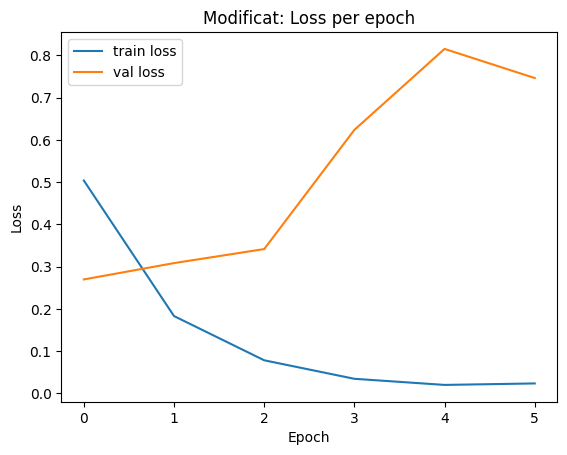

500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.8800 - loss: 0.2901
Modificat Test loss: 0.2896, Test accuracy: 0.8812

Taula de resultats:
| Model                  |   Test Accuracy |
|:-----------------------|----------------:|
| LSTM estàndard         |         0.85132 |
| Transformer-exercici-3 |         0.84752 |
| Transformer-modificat  |         0.88124 |


In [7]:
# Torno a posar aquest codi perquè he fet l'entrenament en una nova sessió
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import RandomUniform

x_train_part, x_val, y_train_part, y_val = train_test_split(
    x_train, y_train, test_size=0.15, random_state=42
)

# màxima longitud de 400 (ho fan així al paper)
maxlen = 400
x_train_pad = pad_sequences(x_train_part, maxlen=maxlen, padding='post', truncating='post')
x_val_pad   = pad_sequences(x_val,       maxlen=maxlen, padding='post', truncating='post')
x_test_pad  = pad_sequences(x_test,      maxlen=maxlen, padding='post', truncating='post')

embedding_dim = 100


# Input i embeddings
inp = keras.Input(shape=(maxlen,), dtype='int32')
x = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inp)

# MHA (8), residual, normalització i dropout
attn = layers.MultiHeadAttention(num_heads=8, key_dim=embedding_dim)(x, x)
attn = layers.Dropout(0.1)(attn)
x1   = layers.Add()([x, attn])
x1   = layers.LayerNormalization()(x1)   

#Feed-forward, residual, norm, dropout 
ff = layers.Conv1D(filters=embedding_dim*2, kernel_size=1, activation='relu')(x1)
ff = layers.Dropout(0.1)(ff)
ff = layers.Conv1D(filters=embedding_dim, kernel_size=1)(ff)
x2 = layers.Add()([x1, ff])
x2 = layers.LayerNormalization()(x2)

# capa LSTM
x3 = layers.Bidirectional(layers.LSTM(embedding_dim, return_sequences=True))(x2)
x3 = layers.LayerNormalization()(x3)

# pooling i classificació
pooled = layers.GlobalAveragePooling1D()(x3)
drop   = layers.Dropout(0.2)(pooled)
out    = layers.Dense(1, activation='sigmoid')(drop)

# model
model2 = keras.Model(inputs=inp, outputs=out)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

# entrenament
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
hist = model2.fit(
    x_train_pad, y_train_part,
    validation_data=(x_val_pad, y_val),
    epochs=50,
    batch_size=50,
    callbacks=[es]
)

# resultats
import matplotlib.pyplot as plt

plt.figure()
plt.plot(hist.history['accuracy'],    label='train acc')
plt.plot(hist.history['val_accuracy'],label='val acc')
plt.title('Modificat: Accuracy per epoch')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

plt.figure()
plt.plot(hist.history['loss'],    label='train loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.title('Modificat: Loss per epoch')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.show()

# avaluació
test_loss3, test_acc3 = model2.evaluate(x_test_pad, y_test, batch_size=50)
print(f"Modificat Test loss: {test_loss3:.4f}, Test accuracy: {test_acc3:.4f}")

import pandas as pd
results = pd.DataFrame([
    {'Model': 'LSTM estàndard',         'Test Accuracy': 0.85132},
    {'Model': 'Transformer-exercici-3','Test Accuracy': 0.84752},
    {'Model': 'Transformer-modificat',  'Test Accuracy': test_acc3},
])
print("\nTaula de resultats:")
print(results.to_markdown(index=False))

En aquesta versió s'ha obtingut un millor resultat desde l'època 1. Això és deu a una millor capacitat de projecció amb 8 caps d'atenció, el bloc feed-forward residual i la capa LSTM. Combinats amb la regularització adicional, han fet possible una convergència més ràpida una obtenció de millors resultats.

## 5 Downstream model. (3 punts)
Un model downstream (o tasca downstream) és un model o tasca que utilitza un model preentrenat en una fase anterior, sovint coneguda com a fase de preentrenament, per resoldre una tasca específica. Aquest model posteriorment es fa servir mitjançant un entrenament específic per resoldre una tasca diferent. Si la tasca té característiques similars i l'arquitectura de la xarxa és prou complexa com per captar els fonaments compartits, és una estratègia que porta molts avantatges.

Un dels grans avantatges dels Transformers és la seva escalabilitat. Per entendre això es recomana ampliar els coneixements amb alguns recursos divulgatius com els següents:
* https://www.youtube.com/watch?v=EFkbT-1VGTQ
* https://www.fabricatedknowledge.com/p/ai-foundations-part-1-transformers
* https://www.baeldung.com/cs/rnns-transformers-nlp

In [1]:
# Preparació per kaggle (reiniciar entorn)
!pip install -q tensorflow==2.14.0 --upgrade
!pip install -q tensorflow_text==2.14.0 --upgrade
!pip install -q tf-models-official==2.14.0 --upgrade
!pip install -q keras==2.14.0 --upgrade
!pip install -q tensorflow-estimator==2.14.0 --upgrade
!pip install -q tensorflow-hub==0.16.1 --upgrade
!pip install -q tensorflow-datasets==4.9.2 --upgrade
!pip install -q tensorflow-metadata==1.14.0 --upgrade
!pip install -q tensorflow-io-gcs-filesystem==0.37.1 --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.14.0 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
pandas-gbq 0.26.1 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is inco

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

print("Versió de TensorFlow:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))
if gpus:
    print("GPUs detectades:", gpus)
    details = tf.config.experimental.get_device_details(gpus[0])
    print("Detalls de la GPU:", details)
else:
    print("No s’ha detectat GPU")

print(hub.__version__)
print(text.__version__)

2025-05-14 08:04:20.523119: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-14 08:04:20.523218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-14 08:04:20.523259: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Versió de TensorFlow: 2.14.0
Num GPUs Available: 0
No s’ha detectat GPU
0.16.1
2.14.0


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [2 pt]:</strong>

En aquest exercici prendrem les dades que hem utilitzat fins ara i farem un downstream model del model BERT. Aquesta part està mostrada al següent tutorial: https://www.tensorflow.org/text/tutorials/classify_text_with_bert

Hauràs d'adaptar-la per treballar amb les dades que hem carregat anteriorment. Tria la versió del model que consideris i pren les decisions adequades justificant-les posteriorment. La dificultat principal en aquest exercici és adaptar el codi del tutorial a les dades i particions que has carregat durant l'exercici. Per això:
* Entrena un model amb l'arquitectura BERT més petita mostrada al tutorial anterior. Trieu adequadament el nombre d'èpoques i controleu l'entrenament amb un early stopping
* Mostra el resum del model amb el nombre de paràmetres
* Mostra les gràfiques d'entrenament i validació.
* Finalment completa la taula de resultats i mostra-la

</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<p><strong>Solución:</strong> </p>
</div>

In [6]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Carreguem dades
start_char = 1
oov_char   = 2
index_from = 3

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(
    start_char=start_char,
    oov_char=oov_char,
    index_from=index_from
)
word_index = keras.datasets.imdb.get_word_index()

inverted_word_index = {i + index_from: w for w, i in word_index.items()}
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char]   = "[OOV]"

# Passem de tokens a text
def decode_review(sequence):
    return " ".join(
        inverted_word_index.get(i, "[UNK]") 
        for i in sequence 
        if i != 0
    )

# Entrenament i validació
x_train_part, x_val, y_train_part, y_val = train_test_split(
    x_train, y_train, test_size=0.15, random_state=42
)

# Preparem per BERT
x_train_text = [decode_review(seq) for seq in x_train_part]
x_val_text   = [decode_review(seq) for seq in x_val]
x_test_text  = [decode_review(seq) for seq in x_test]

# (text, etiqueta)
batch_size = 32
AUTOTUNE   = tf.data.AUTOTUNE

train_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_train_text, y_train_part))
      .shuffle(buffer_size=len(x_train_text), seed=42)
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)
val_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_val_text, y_val))
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)
test_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_test_text, y_test))
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)

# Handlers de TF-Hub per a Small BERT
tfhub_handle_encoder    = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

# Model downstream finetuned
def build_classifier_model():
    text_input        = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_lay = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs    = preprocessing_lay(text_input)
    encoder           = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs           = encoder(encoder_inputs)
    net               = outputs['pooled_output']
    net               = tf.keras.layers.Dropout(0.1)(net)
    net               = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

classifier_model = build_classifier_model()

# Compilació
epochs           = 1
steps_per_epoch  = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps  = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)
init_lr          = 3e-5

optimizer = optimization.create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    optimizer_type='adamw'
)

classifier_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.metrics.BinaryAccuracy(name='accuracy')]
)

# Resum
classifier_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                            

665/665 [==============================] - 2272s 3s/step - loss: 0.4355 - accuracy: 0.7843 - val_loss: 0.3712 - val_accuracy: 0.8328


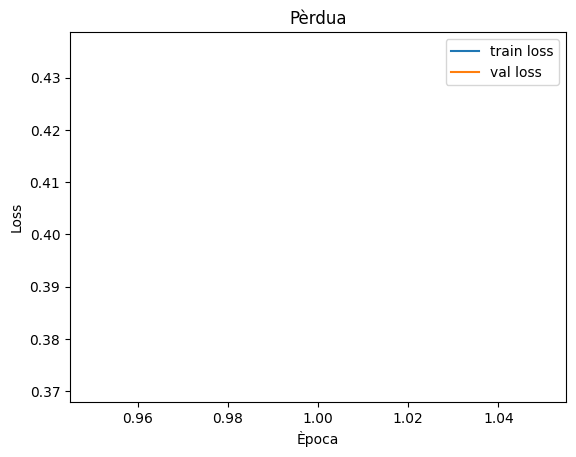

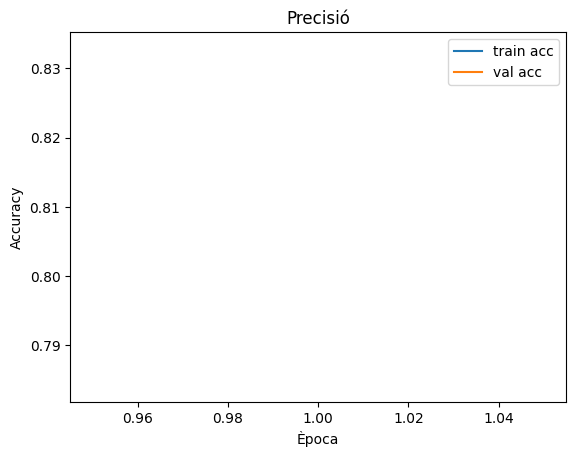

782/782 [==============================] - 580s 742ms/step - loss: 0.3515 - accuracy: 0.8401

Taula de resultats:
| Model                           |   Test Accuracy |
|:--------------------------------|----------------:|
| LSTM estàndard                  |         0.85132 |
| Transformer-exercici-3-millorat |         0.88124 |
| BERT-small finetuned            |         0.84008 |


In [7]:
# Entrenament
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = classifier_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es]
)

# Resultats
h = history.history
epochs_range = range(1, len(h['loss']) + 1)

plt.figure()
plt.plot(epochs_range, h['loss'],    label='train loss')
plt.plot(epochs_range, h['val_loss'],label='val loss')
plt.title('Pèrdua'); plt.xlabel('Època'); plt.ylabel('Loss'); plt.legend(); plt.show()

plt.figure()
plt.plot(epochs_range, h['accuracy'],    label='train acc')
plt.plot(epochs_range, h['val_accuracy'],label='val acc')
plt.title('Precisió'); plt.xlabel('Època'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

# Comparativa
test_loss, test_acc = classifier_model.evaluate(test_ds)

results = pd.DataFrame([
    {'Model': 'LSTM estàndard',           'Test Accuracy': 0.85132},
    {'Model': 'Transformer-exercici-3-millorat',   'Test Accuracy':  0.88124},
    {'Model': 'BERT-small finetuned',     'Test Accuracy': test_acc},
])
print("\nTaula de resultats:")
print(results.to_markdown(index=False))

Surten els plots buits perquè només he entrenat una època. He deixat el early stopping per mostrar com seria el codi complet, però entrenant només amb una època no és necessari. Podem veure com el model ha tingut un 84% d'acc en la primera època, mostrant que, segurament, amb més temps d'entrenament es podrien obtindre millors resultats.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [1 pt]:</strong>

Repeteix l'exercici anterior però ara fent servir un model BERT més gran. Heu d'utilitzar un model que sigui capaç d'obtenir millors resultats que en tots els casos anteriors. Finetunejar un model gran pot requerir diverses hores.
* Afegeix a la taula de resultats, el resultat obtingut amb aquest model.
* Igual que abans representa les gràfiques d'accuracy i loss.
* Comenta els resultats i discuteix els temps d'entrenament emprats

</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<p><strong>Solució:</strong> </p>
</div>

In [ ]:
import time
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Carreguem dades
start_char = 1
oov_char   = 2
index_from = 3

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(
    start_char=start_char,
    oov_char=oov_char,
    index_from=index_from
)
word_index = keras.datasets.imdb.get_word_index()

inverted_word_index = {i + index_from: w for w, i in word_index.items()}
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char]   = "[OOV]"

# Passem de tokens a text
def decode_review(sequence):
    return " ".join(
        inverted_word_index.get(i, "[UNK]") 
        for i in sequence 
        if i != 0
    )

# Entrenament i validació
x_train_part, x_val, y_train_part, y_val = train_test_split(
    x_train, y_train, test_size=0.15, random_state=42
)

# Preparem per BERT
x_train_text = [decode_review(seq) for seq in x_train_part]
x_val_text   = [decode_review(seq) for seq in x_val]
x_test_text  = [decode_review(seq) for seq in x_test]

# (text, etiqueta)
batch_size = 32
AUTOTUNE   = tf.data.AUTOTUNE

train_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_train_text, y_train_part))
      .shuffle(buffer_size=len(x_train_text), seed=42)
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)
val_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_val_text, y_val))
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)
test_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_test_text, y_test))
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)

tfhub_handle_encoder    = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

def build_classifier_model():
    text_input        = keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_lay = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs    = preprocessing_lay(text_input)
    encoder           = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs           = encoder(encoder_inputs)
    net               = outputs['pooled_output']
    net               = keras.layers.Dropout(0.1)(net)
    net               = keras.layers.Dense(1, activation=None, name='classifier')(net)
    return keras.Model(text_input, net)

classifier_model = build_classifier_model()

epochs           = 1
steps_per_epoch  = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps  = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)
init_lr          = 3e-5

optimizer = optimization.create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    optimizer_type='adamw'
)

classifier_model.compile(
    optimizer=optimizer,
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name='accuracy')]
)

classifier_model.summary()

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

start_time = time.time()
history = classifier_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es]
)
elapsed = time.time() - start_time
print(f"\nTemps d'entrenament (segons): {elapsed:.0f}s  ({elapsed/3600:.2f}h)\n")

2025-05-13 07:27:21.987511: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-13 07:27:21.987594: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-13 07:27:21.987634: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


1641221/1641221 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                               

Al haver entrenat solament una època no té sentit mostrar gràfiques de accuracy i loss. Tot i això, el resultat de accuract en validació és del 87,9% amb una sola època (s'ha de tindre en compte la diferència de paràmetres, en aquest cas 109483010). El temps d'entrenament ha sigut tan elevat (casi 5h per època) que no sembla un mètode viable.

## 6 Optimitzant els entrenaments. (2 punts)
Hauràs observat que un dels desavantatges de les grans arquitectures transformers de xarxes neuronals és que requereixen una gran potència de còmput per entrenar-se correctament. Això no és només un problema de temps, sinó de diners.
El maquinari i l'electricitat suposen el cost operatiu principal d'aquestes arquitectures, per la qual cosa optimitzar-les és primordial i suposa un avantatge competitiu (vegeu el cas de DeepSeek).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [0.5 pt]:</strong>

Repeteix l'exercici anterior però ara només prova les últimes capes. És a dir, en aquest cas el bloc BERT es queda congelat. Podeu provar d'afegir alguna capa entre el bloc BERT i la sortida.
* Afegeix a la taula de resultats, el resultat obtingut amb aquest model
* Comenta els resultats i discuteix els temps d'entrenament emprats. És una estratègia útil? Quines altres alternatives similars hi ha?

</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<p><strong>Solució:</strong> </p>
</div>

In [4]:
import time
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Carreguem dades
start_char = 1
oov_char   = 2
index_from = 3

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(
    start_char=start_char,
    oov_char=oov_char,
    index_from=index_from
)
word_index = keras.datasets.imdb.get_word_index()

inverted_word_index = {i + index_from: w for w, i in word_index.items()}
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char]   = "[OOV]"

# Passem de tokens a text
def decode_review(sequence):
    return " ".join(
        inverted_word_index.get(i, "[UNK]") 
        for i in sequence 
        if i != 0
    )

# Entrenament i validació
x_train_part, x_val, y_train_part, y_val = train_test_split(
    x_train, y_train, test_size=0.15, random_state=42
)

# Preparem per BERT
x_train_text = [decode_review(seq) for seq in x_train_part]
x_val_text   = [decode_review(seq) for seq in x_val]
x_test_text  = [decode_review(seq) for seq in x_test]

# (text, etiqueta)
batch_size = 32
AUTOTUNE   = tf.data.AUTOTUNE

train_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_train_text, y_train_part))
      .shuffle(buffer_size=len(x_train_text), seed=42)
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)
val_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_val_text, y_val))
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)
test_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_test_text, y_test))
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)

tfhub_handle_encoder    = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

# model congelat
def build_frozen_bert_model():
    text_input        = keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_lay = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs    = preprocessing_lay(text_input)
    # congelat
    bert_encoder      = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
    bert_outputs      = bert_encoder(encoder_inputs)
    x                 = bert_outputs['pooled_output']
    # capes addicionals
    x                 = keras.layers.Dense(256, activation='relu', name='intermediate')(x)
    x                 = keras.layers.Dropout(0.1)(x)
    output            = keras.layers.Dense(1, activation=None, name='classifier')(x)
    return keras.Model(text_input, output)

frozen_model = build_frozen_bert_model()

# compilació
epochs           = 1
steps_per_epoch  = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps  = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)
init_lr          = 3e-5

optimizer = optimization.create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    optimizer_type='adamw'
)
frozen_model.compile(
    optimizer=optimizer,
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name='accuracy')]
)

frozen_model.summary()

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
start_time = time.time()
history_frozen = frozen_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es]
)
elapsed_frozen = time.time() - start_time
print(f"\nTemps d'entrenament (segons): {elapsed_frozen:.0f}s  ({elapsed_frozen/3600:.2f}h)")

test_loss_frozen, test_acc_frozen = frozen_model.evaluate(test_ds, verbose=0)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                            

In [6]:
results = pd.DataFrame([
    {'Model': 'LSTM estàndard',          'Test Accuracy': 0.85132},
    {'Model': 'Transformer-exercici-3-millorat',  'Test Accuracy': 0.88124},
    {'Model': 'BERT-small finetuned',    'Test Accuracy':  0.84008},
    {'Model': 'BERT-base (L-12 H-768)',   'Test Accuracy': 0.8789},
    {'Model': 'BERT-base frozen head',    'Test Accuracy': test_acc_frozen},
])
print("\nTaula de resultats:")
print(results.to_markdown(index=False))


Taula de resultats:
| Model                           |   Test Accuracy |
|:--------------------------------|----------------:|
| LSTM estàndard                  |         0.85132 |
| Transformer-exercici-3-millorat |         0.88124 |
| BERT-small finetuned            |         0.84008 |
| BERT-base (L-12 H-768)          |         0.8789  |
| BERT-base frozen head           |         0.52196 |


Els resultats de congelar les capes no ha sigut gens bons, s'hauria de fer una búsqueda d'hiperparàmetres òptims haviam si millora el resultat. També s'hauria de entrenar més èpoques per a que el model pugui ajustar les capes finals. Al estar treballant amb un model que només entrena 197121 paràmetres, és més viable fer un entrenament amb més epochs. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [1.5 pt]:</strong>  Catastrophic forgetting.

A la secció 5.3.3 del paper How to Fine-Tune BERT for Text Classification? https://arxiv.org/pdf/1905.05583v3 s'estudia el Catastrophic forgetting. Aquesta situació és molt delicada en els models de transformers de gran escala i s'ha de comprendre molt bé per evitar aquestes situacions

* Reprodueix la figura "Figure 2: Catastrophic Forgetting" d'aquest article científic. En concret, les subfigures c i d. Només cal que ho facis sobre la corba de train. L'eix x d'aquestes figures (iterations), pots considerar que són els batches d'entrenament, mentre que l'eix Y fa referència al loss. No cal que utilitzis exactament els valors de lr que es mostren en aquesta figura. L'objectiu és que mostris un cas en què el lr és tan gran que es produeix el Catastrophic forgetting, i un altre cas amb un altre valor en què això no passa.
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<p><strong>Solució:</strong> </p>
</div>


--- Entrenant amb init_lr = 0.0001 (estable) ---
166/166 [==============================] - 3652s 22s/step - loss: 0.4251 - accuracy: 0.7877

--- Entrenant amb init_lr = 0.0004 (forgetting) ---
166/166 [==============================] - 3504s 21s/step - loss: 0.6082 - accuracy: 0.6928


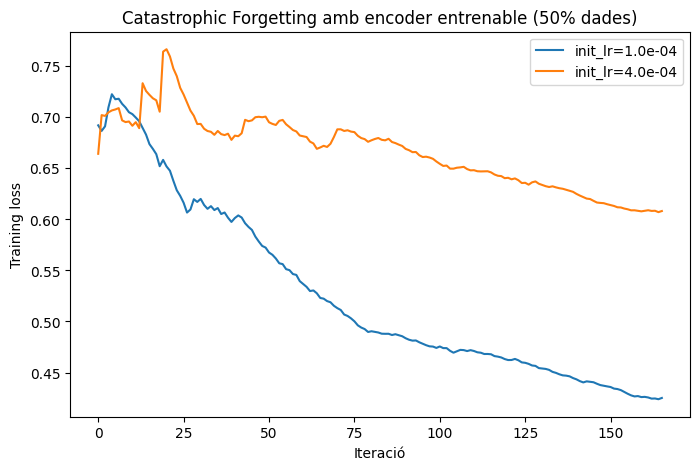

In [7]:
import time
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Carreguem dades
start_char = 1
oov_char   = 2
index_from = 3

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(
    start_char=start_char,
    oov_char=oov_char,
    index_from=index_from
)
word_index = keras.datasets.imdb.get_word_index()

inverted_word_index = {i + index_from: w for w, i in word_index.items()}
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char]   = "[OOV]"

# Passem de tokens a text
def decode_review(sequence):
    return " ".join(
        inverted_word_index.get(i, "[UNK]") 
        for i in sequence 
        if i != 0
    )

# Entrenament i validació
x_train_part, x_val, y_train_part, y_val = train_test_split(
    x_train, y_train, test_size=0.15, random_state=42
)

# Preparem per BERT
x_train_text = [decode_review(seq) for seq in x_train_part]
x_val_text   = [decode_review(seq) for seq in x_val]
x_test_text  = [decode_review(seq) for seq in x_test]

# (text, etiqueta)
batch_size = 32
AUTOTUNE   = tf.data.AUTOTUNE

train_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_train_text, y_train_part))
      .shuffle(buffer_size=len(x_train_text), seed=42)
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)
val_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_val_text, y_val))
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)
test_ds = (
    tf.data.Dataset
      .from_tensor_slices((x_test_text, y_test))
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)

tfhub_handle_encoder    = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

class BatchLossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.batch_losses = []

    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs.get('loss'))

# Model amb encoder entrenable
def build_trainable_bert_model():
    text_input        = keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_lay = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs    = preprocessing_lay(text_input)
    bert_encoder      = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    bert_outputs      = bert_encoder(encoder_inputs)
    x                 = bert_outputs['pooled_output']
    x                 = keras.layers.Dense(256, activation='relu', name='intermediate')(x)
    x                 = keras.layers.Dropout(0.1)(x)
    output            = keras.layers.Dense(1, activation=None, name='classifier')(x)
    return keras.Model(text_input, output)

# Només 25% de training set
quarter_size = len(x_train_text) // 4
reduced_x_train_text = x_train_text[:quarter_size]
reduced_y_train_part = y_train_part[:quarter_size]

# Dataset sense validació
batch_size = 32
AUTOTUNE   = tf.data.AUTOTUNE

train_ds = (
    tf.data.Dataset
      .from_tensor_slices((reduced_x_train_text, reduced_y_train_part))
      .shuffle(buffer_size=len(reduced_x_train_text), seed=42)
      .batch(batch_size)
      .cache()
      .prefetch(AUTOTUNE)
)

# Entrenament
epochs           = 1
steps_per_epoch  = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps  = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)

lrs = {
    'estable':    1e-4,
    'forgetting': 4e-4
}
histories = {}

for name, init_lr in lrs.items():
    print(f"\n--- Entrenant amb init_lr = {init_lr} ({name}) ---")
    model = build_trainable_bert_model()

    optimizer = optimization.create_optimizer(
        init_lr=init_lr,
        num_train_steps=num_train_steps,
        num_warmup_steps=num_warmup_steps,
        optimizer_type='adamw'
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy(name='accuracy')]
    )

    batch_history = BatchLossHistory()
    model.fit(
        train_ds,
        epochs=epochs,
        callbacks=[batch_history],
        verbose=1
    )

    histories[name] = batch_history.batch_losses

plt.figure(figsize=(8, 5))
for name, losses in histories.items():
    plt.plot(losses, label=f'init_lr={lrs[name]:.1e}')
plt.xlabel('Iteració')
plt.ylabel('Training loss')
plt.title('Catastrophic Forgetting amb encoder entrenable (25% dades)')
plt.legend()
plt.show()

**Comentari sobre l'exercici:**
Per reduïr el temps d'entrenament, fet servir solament el 25% de les dades totals, ja que tot i així els temps d'entrenament eren >1h. 

**Resolució:**
Es pot veure com amb un lr massa gran (4e-4) pot provocar l'efecte de catastrophic forgetting, ja que implica actualitzacions massa grans a l'encoder, incrementant la loss i reduint la capacitat de mantenir el coneixement previ. 

En canvi, un lr moderat (1e-4) permet ajustar l'encoder progressivament, assegurant un descens consistent de la loss.

## 7 Estratègia final. (1 punt)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<p><strong>Exercici [1 pt]:</strong>
Amb tot allò que has après. Finalment, entrena un model de BERT per a classificació i intenta obtenir els millors resultats possibles.

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<p><strong>Solució:</strong> </p>
</div>

In [1]:
import time
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    get_linear_schedule_with_warmup
)
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
import numpy as np

# Farem servir la GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
    current_gpu = torch.cuda.current_device()
    gpu_name = torch.cuda.get_device_name(current_gpu)
    print(f"Usant GPU #{current_gpu}: {gpu_name}")
else:
    print("Usant CPU")

# joc de dades
t_start_char, oov_char, index_from = 1, 2, 3
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    start_char=t_start_char,
    oov_char=oov_char,
    index_from=index_from
)
word_index = imdb.get_word_index()
inv_word_index = {i + index_from: w for w, i in word_index.items()}
inv_word_index[t_start_char] = "[START]"
inv_word_index[oov_char] = "[OOV]"

def decode_review(sequence):
    return " ".join(inv_word_index.get(idx, "[UNK]") for idx in sequence if idx != 0)

texts = [decode_review(x) for x in np.concatenate([x_train, x_test])]
labels = np.concatenate([y_train, y_test])
t_train, t_val, y_tr, y_val = train_test_split(
    texts,
    labels,
    test_size=0.15,
    random_state=42
)

# dataset
class IMDbDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=400):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        encoding = self.tokenizer(
            self.texts[index],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[index], dtype=torch.long)
        }

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
train_dataset = IMDbDataset(t_train, y_tr, tokenizer, max_len=400)
val_dataset = IMDbDataset(t_val, y_val, tokenizer, max_len=400)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2
).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
total_steps = len(train_loader) * 5
warmup_steps = int(0.1 * total_steps)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps
)

# Fine-tuning progressiu
def set_trainable_layers(model, epoch):
    if epoch == 1:
        for _, param in model.bert.named_parameters():
            param.requires_grad = False
    elif epoch == 2:
        for name, param in model.bert.named_parameters():
            param.requires_grad = ('encoder.layer.11' in name)
    elif epoch in (3, 4):
        for name, param in model.bert.named_parameters():
            param.requires_grad = any(f'encoder.layer.{i}' in name for i in (10, 11))
    else:
        for param in model.bert.parameters():
            param.requires_grad = True

# entrenament
best_val_loss = float('inf')
patience = 2
counter = 0
start_time = time.time()

for epoch in range(1, 6):
    set_trainable_layers(model, epoch)
    model.train()
    train_loss = 0.0

    print(f"Entrenant - Epoch {epoch}")
    for batch in train_loader:
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    print(f"Training Loss: {avg_train_loss:.4f}")

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            val_loss += outputs.loss.item()
            preds = outputs.logits.argmax(dim=1)
            correct += (preds == batch['labels']).sum().item()
            total += batch['labels'].size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total
    print(f"Validation Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

elapsed_time = time.time() - start_time
print(f"Total training time: {elapsed_time:.2f} seconds")

2025-05-14 12:16:53.690229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747225013.701848 2445945 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747225013.705411 2445945 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747225013.715378 2445945 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747225013.715387 2445945 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747225013.715388 2445945 computation_placer.cc:177] computation placer alr

Usant GPU #0: NVIDIA A40


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Entrenant - Epoch 1
Training Loss: 0.6865
Validation Loss: 0.6756, Val Accuracy: 0.5771
Entrenant - Epoch 2
Training Loss: 0.3474
Validation Loss: 0.2355, Val Accuracy: 0.9063
Entrenant - Epoch 3
Training Loss: 0.2468
Validation Loss: 0.2189, Val Accuracy: 0.9157
Entrenant - Epoch 4
Training Loss: 0.2221
Validation Loss: 0.2123, Val Accuracy: 0.9183
Entrenant - Epoch 5
Training Loss: 0.2017
Validation Loss: 0.1971, Val Accuracy: 0.9240
Total training time: 2108.38 seconds


**Comentari previ:** Deguts els temps d'entrenament de tota la pac, he decidit fet servir torch en comptes de tensorflow. El motiu és que a la feina acostumo a fer-lo servir i ja tinc el servidor configurat per entrenar amb GPU. S'ha fet servir una NVIDIA A40 per reduir el temps d'entrenament de vàries hores per època a pocs minuts.

**Coneixements apresos i aplicats:**

- He après que entrenar models amb una CPU no sempre és viable i que entrenar amb GPU pot reduir molt els temps d'entrenament.

- Carrego els pesos preentrenats i hi afegeixo al final un classificador per dues classes.

- He fet servir "get_linear_schedule_with_warmup" per ajustar el learning rate durant l'entrenament. Al principi de l'entrenament el lr és petit i va augmentar a poc a poc, evitant que el model faci canvis massa grans abans d'haver començat a aprendre. Després es va reduint de forma lineal, ajudant al model a ajustar-se en la part final de l'entrenament. 

- He fet servir un descongelament gradual en comptes de congelar totes les capes del encoder. En la primera capa s'entrena només el classificador, en la segona s'hi entrenen característiques d'alt nivell. En les èpoques 3 i 4 es fa fine-tuning a capes més profundes i a partir de la 5 època, s'ajusta tot el model.

**Resum: El descongelament gradual activa progressivament les capes del model per evitar sobreescriure coneixement previ, el scheduler regula el learning rate començant amb valors baixos i reduint-lo de manera lineal al llarg del temps. Aquestes dues tècniques s'han aplicat juntes per optimitzar l'entrenament.

Resultats: S'ha obtingut un accuracy en validació del 92.4%, sense dubte el millor de tots els resultats. Es podrien haver entrenat més èpoques, ja que l'early stopping no ha arribat a saltar. 